In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [73]:
def f1(x):
    return np.array([v * math.sin(v) + 2*v for v in x])

def f2(x):
    return np.array([10*math.sin(v) + v*v for v in x])

def f3(x):
    return np.array([math.copysign(1,v)*(v*v + 300) + 20*math.sin(v) for v in x])

functions = [f1,f2,f3]

In [95]:
def inject_noise(y):
    return y + np.random.normal(0, 50, size=y.size)

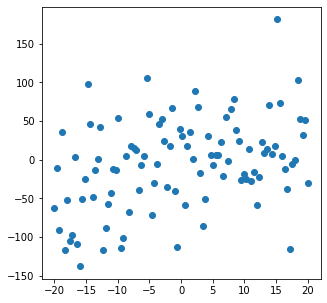

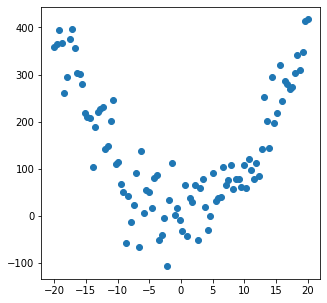

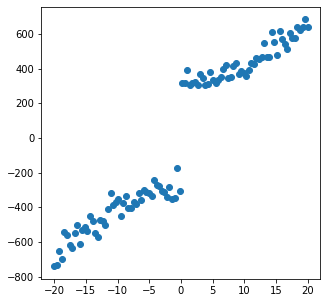

In [96]:
tr = 20
n_samples = 100
x = np.linspace(-tr, tr, n_samples)

for f in functions:
    y = f(x)
    y = inject_noise(y)
    _, ax = plt.subplots(figsize=(5,5))
    ax.scatter(x,y)
    plt.show()

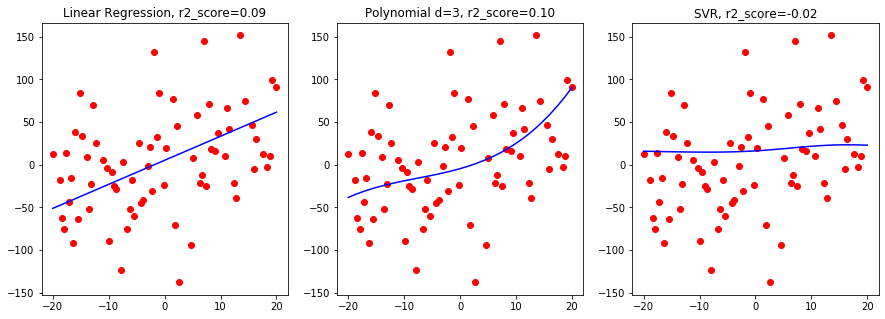

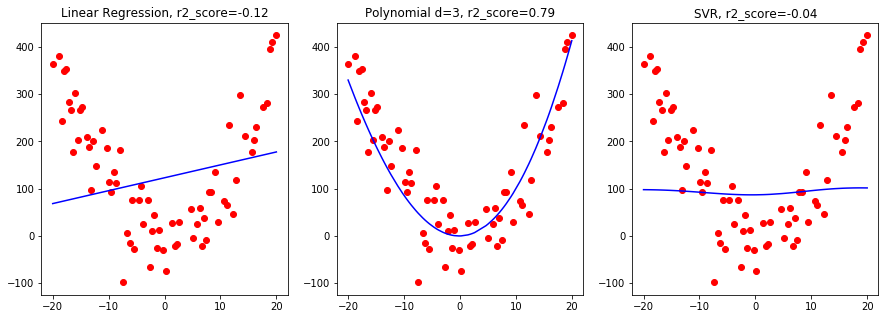

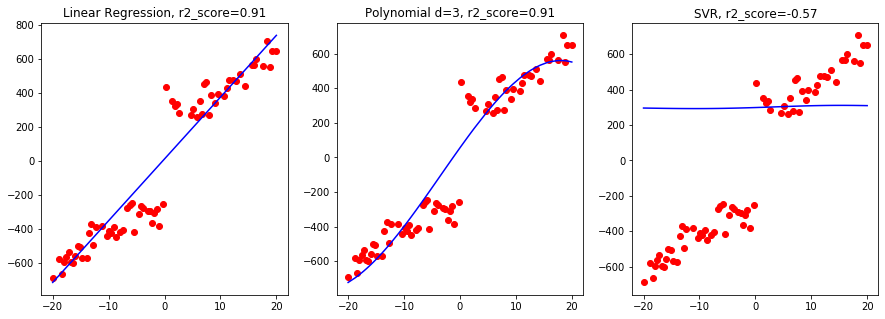

In [98]:
degree = 3
regs = [LinearRegression(fit_intercept = True), make_pipeline(PolynomialFeatures(degree), LinearRegression()), SVR(gamma='scale', C=1.0, epsilon=0.1)]
titles = ["Linear Regression", f"Polynomial d={degree}", "SVR"]

for j,f in enumerate(functions):
    fig ,ax = plt.subplots(1 ,len(regs) , figsize=(15,5))
    y = f(x)
    y = inject_noise(y)
    
    for i,reg in enumerate(regs):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=30, random_state=42, shuffle=True)
        y_test = y_test[x_test.argsort()]
        x_test.sort()

        reg.fit(x_train[:, np.newaxis], y_train)
        y_pred = reg.predict(x_test[:, np.newaxis])
#         score = cross_val_score(reg, x_test[:, np.newaxis], y_test, cv=5, scoring='r2')
        score = r2_score(y_test, y_pred)
        ax[i].scatter(x_test,y_test, c ='r')
        ax[i].plot(x_test,y_pred, 'b')
        ax[i].set_title(f'{titles[i]}, r2_score={score:.2f}')

plt.show()

In [76]:
# MULTIPLE LINEAR REGRESSION

x_mat = x[:, np.newaxis]
x_sin = np.array([math.sin(v) for v in x_mat])[:,np.newaxis]
x_squared = np.array([math.pow(v,2) for v in x_mat])[:,np.newaxis]

x_augmented = np.hstack((x_mat, x_sin, x_squared))

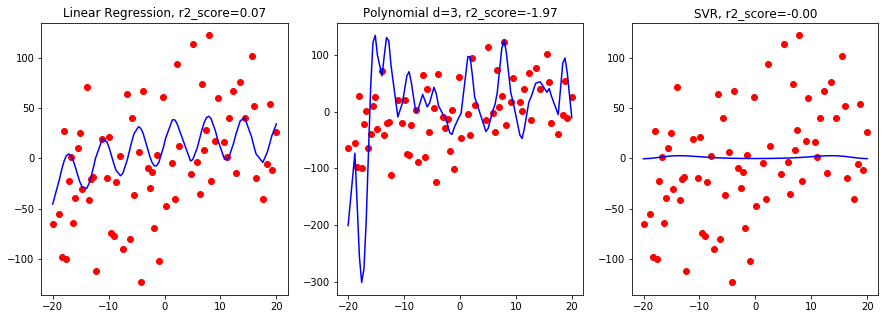

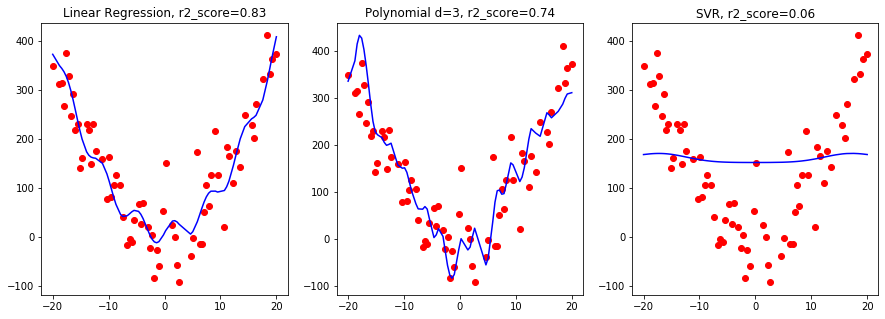

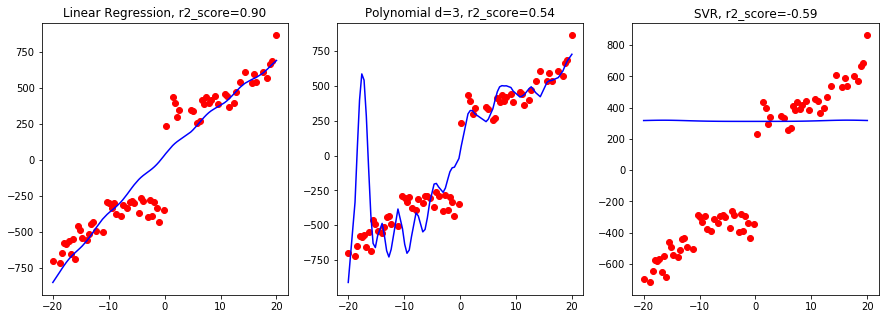

In [100]:
degree = 2
regs = [LinearRegression(fit_intercept = True), make_pipeline(PolynomialFeatures(degree), LinearRegression()), SVR(gamma='scale', C=1.0, epsilon=0.1)]
titles = ["Linear Regression", f"Polynomial d={degree}", "SVR"]

for j,f in enumerate(functions):
    fig ,ax = plt.subplots(1 ,len(regs) , figsize=(15,5))
    y = f(x)
    y = inject_noise(y)
    
    for i,reg in enumerate(regs):

        x_train, x_test, y_train, y_test = train_test_split(x_augmented, y, train_size=30, random_state=42, shuffle=True)
        y_test = y_test[x_test[:,0].argsort()]
        x_test = x_test[x_test[:,0].argsort()]

        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
#         score = cross_val_score(reg, x_test[:, np.newaxis], y_test, cv=5, scoring='r2')
        score = r2_score(y_test, y_pred)
        ax[i].scatter(x_test[:,0],y_test, c ='r')
        ax[i].plot(x_test[:,0],y_pred, 'b')
        ax[i].set_title(f'{titles[i]}, r2_score={score:.2f}')

plt.show()